In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r'C:\Users\jibin\Downloads\titanic_dataset (1).csv',index_col='PassengerId')

In [3]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
dataset.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
dataset.drop(['Name'],axis=1,inplace=True) # 891 unique value, hence no relevance in model creation

In [9]:
dataset.drop(['Ticket'],axis=1,inplace=True) # 681 unique value, hence no relevance in model creation

In [10]:
dataset.drop(['Cabin'],axis=1,inplace=True) # 77% is of data is missing

In [11]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [13]:
dataset.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
# missing value handling

In [15]:
graph= dataset.select_dtypes(include=['float']) # ploting graph to understand the skewness of data

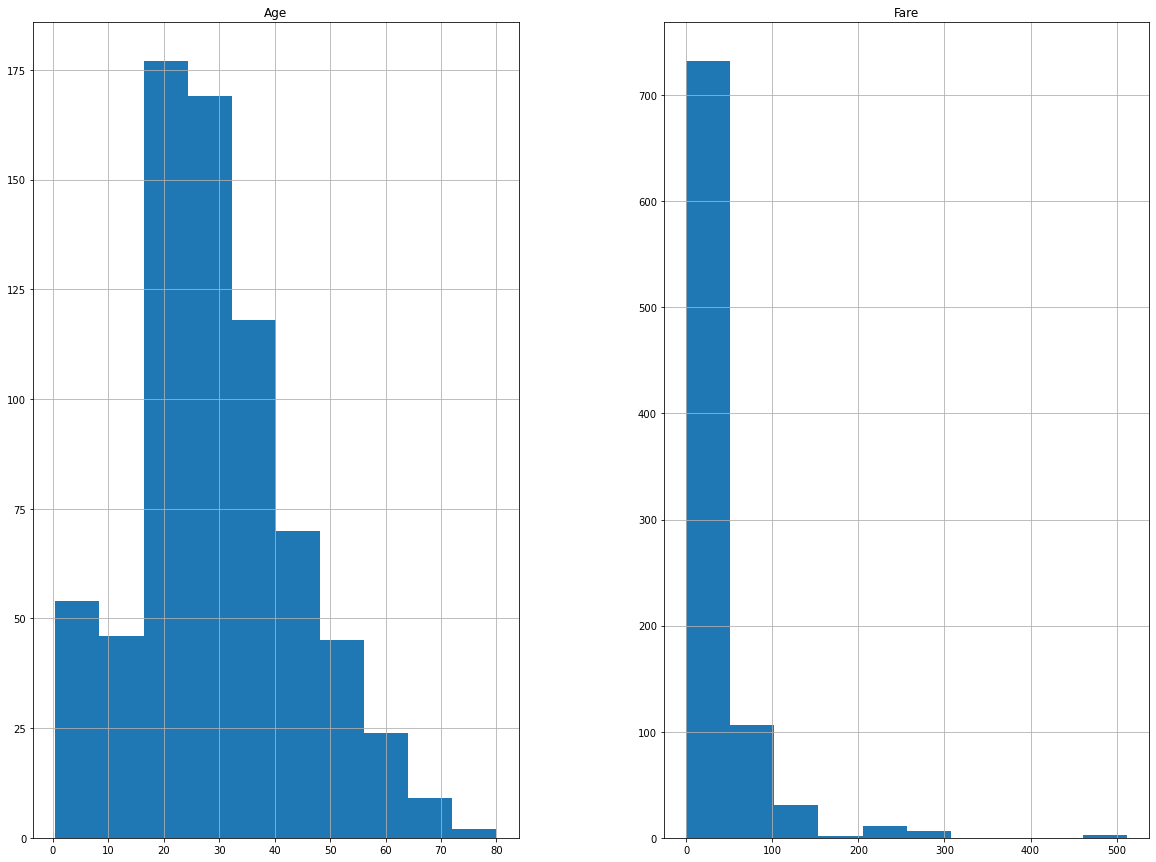

In [16]:
graph.hist(figsize=(20,15))  # from the figure, understand that the mising value is filled using median- right skewed data
plt.show()

In [17]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median()) # median to fill missing values

In [18]:
dataset['Embarked']=dataset['Embarked'].fillna("S")

In [19]:
dataset.isna().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
from sklearn import preprocessing

In [21]:
label_encoder=preprocessing.LabelEncoder()

In [22]:
dataset['Sex']=label_encoder.fit_transform(dataset['Sex'])

In [23]:
dataset['Embarked']=label_encoder.fit_transform(dataset['Embarked'])

In [24]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [25]:
    from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset) # this will convert into an array
scaled_data=pd.DataFrame(scaled_data,columns=dataset.columns)

In [27]:
scaled_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954


In [28]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [29]:
# splitting dataset into features and target

In [30]:
x=dataset.drop( 'Survived',axis=1)   # feature
y=dataset[ 'Survived'] # target

In [31]:
from sklearn.model_selection import train_test_split  # further splitting to the training and testing set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# SVM

In [33]:
from sklearn.svm import SVC

In [34]:
svm=SVC(kernel='linear') 
svm=svm.fit(x_train,y_train) 
y_pred_svm=svm.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
confusion_matrix(y_test,y_pred_svm) # 88 correct classification,17 mis classification
                                    # 22 mis classification,52 correct classification

array([[88, 17],
       [22, 52]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_svm)

0.7821229050279329

In [38]:
svm2=SVC(kernel='rbf')
svm2=svm2.fit(x_train,y_train)
y_pred_svm2=svm2.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred_svm2) # mis classification increased

array([[99,  6],
       [55, 19]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred_svm2) # accuracy score also decreased

0.659217877094972

In [41]:
# k-fold cross validation

In [42]:
dataset.shape

(891, 8)

In [43]:
from sklearn.model_selection import KFold

In [44]:
kfold_validator=KFold(9)

In [45]:
for train_index,test_index in kfold_validator.split(x,y):  
    print('Training Index:',train_index)   
    print('Test Index:',test_index) 

Training Index: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 34

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_result=cross_val_score(svm,x,y,cv=kfold_validator)

In [48]:
cv_result

array([0.81818182, 0.80808081, 0.75757576, 0.85858586, 0.75757576,
       0.74747475, 0.73737374, 0.82828283, 0.76767677])

In [49]:
np.mean(cv_result)   # finding- the model created is over and under fit(due to sequential selection subset)

0.7867564534231201

In [50]:
# stratified k-fold cross validation

In [51]:
from sklearn.model_selection import StratifiedKFold

In [52]:
skfold_validator=StratifiedKFold(n_splits=9)

In [53]:
for train_index,test_index in skfold_validator.split(x,y):  
    print('Training Index:',train_index) 
    print('Test Index:',test_index) 

Training Index: [ 88  97  98 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 34

In [54]:
skcv_result=cross_val_score(svm,x,y,cv=skfold_validator)

In [55]:
skcv_result

array([0.81818182, 0.77777778, 0.76767677, 0.88888889, 0.75757576,
       0.75757576, 0.73737374, 0.80808081, 0.76767677])

In [56]:
np.mean(skcv_result)

0.7867564534231201